# **AED y Selección de Features - GLOBAL HATO**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Cargamos nuestro dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("df_combined.csv")
df.head(20)

Saving df_combined.csv to df_combined (1).csv


,Fecha,ID_Vaca,Producción Total Diaria (kg),Producción Promedio por Ordeño (kg),Desviación Estándar Producción (kg),Número de Ordeños,Duración Promedio (min),Duración Total Diaria (min),Desviación Estándar Duración (min),Intervalo Promedio entre Ordeños (min),...,DEL,Producción Media 7 Días (kg),Tipo de evento,Estado Reproductivo,Inseminaciones Totales,Inseminacion Actual,Producción del Día Anterior (kg),Produccion Total (kg),Dias en Gestación,Dias para el Parto
0,2024-11-21,1203,2.28,2.280000,0.000000,1,6.333333,6.333333,0.000000,0.000000,...,0,2.280000,Cambio de grupo,Inseminada,6.0,0,0.00,2.28,0,0
1,2024-11-21,1203,2.28,2.280000,0.000000,1,6.333333,6.333333,0.000000,0.000000,...,0,2.280000,Parto,Fresca,6.0,0,2.28,4.56,0,0
2,2024-11-22,1203,8.12,4.060000,3.620387,2,9.658333,19.316667,0.954594,690.500000,...,1,5.200000,Cambio tabla alimentación,Fresca,6.0,0,2.28,12.68,0,0
3,2024-11-23,1203,10.76,5.380000,0.791960,2,8.208333,16.416667,1.873833,557.500000,...,2,7.053333,Sin Evento,Fresca,6.0,0,8.12,23.44,0,0
4,2024-11-24,1203,19.50,6.500000,1.074290,3,12.000000,36.000000,2.330415,601.333333,...,3,10.165000,Sin Evento,Fresca,6.0,0,10.76,42.94,0,0
5,2024-11-25,1203,11.36,5.680000,1.654630,2,14.466667,28.933333,2.262742,605.500000,...,4,10.404000,Sin Evento,Fresca,6.0,0,19.50,54.30,0,0
6,2024-11-26,1203,20.48,10.240000,1.018234,2,10.133333,20.266667,2.522014,906.000000,...,5,12.083333,Sin Evento,Fresca,6.0,0,11.36,74.78,0,0
7,2024-11-27,1203,16.31,8.155000,1.237437,2,8.791667,17.583333,4.607979,591.500000,...,6,12.687143,Sin Evento,Fresca,6.0,0,20.48,91.09,0,0
8,2024-11-28,1203,17.56,8.780000,0.735391,2,9.583333,19.166667,0.447834,628.000000,...,7,14.870000,Invitación Visita Veterinaria,Fresca,6.0,0,16.31,108.65,0,0
9,2024-11-29,1203,20.86,10.430000,0.339411,2,12.425000,24.850000,1.331718,796.500000,...,8,16.690000,Sin Evento,Fresca,6.0,0,17.56,129.51,0,0


En esta seccion estaremos identifacando las caractesristicas clave del dataset que tenemos

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79248 entries, 0 to 79247
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   79248 non-null  object 
 1   ID_Vaca                                 79248 non-null  int64  
 2   Producción Total Diaria (kg)            79248 non-null  float64
 3   Producción Promedio por Ordeño (kg)     79248 non-null  float64
 4   Desviación Estándar Producción (kg)     79248 non-null  float64
 5   Número de Ordeños                       79248 non-null  int64  
 6   Duración Promedio (min)                 79248 non-null  float64
 7   Duración Total Diaria (min)             79248 non-null  float64
 8   Desviación Estándar Duración (min)      79248 non-null  float64
 9   Intervalo Promedio entre Ordeños (min)  79248 non-null  float64
 10  Desviación Estándar Intervalo (min)     79248 non-null  fl

Dropeamos las columnas que no necesitamos

In [ ]:
cols_to_drop = [
    "Fecha",
    "Producción Promedio por Ordeño (kg)",
    "Desviación Estándar Producción (kg)",
    "Número de Ordeños",
    "Duración Promedio (min)",
    "Duración Total Diaria (min)",
    "Desviación Estándar Duración (min)",
    "Intervalo Promedio entre Ordeños (min)",
    "Desviación Estándar Intervalo (min)",
    "Producción por Minuto (kg/min)",
    "Horas entre Ordeños",
    "Tipo de evento"
]

df_clean = df.drop(columns=cols_to_drop, errors='ignore')
df_clean.head(10)


,ID_Vaca,Producción Total Diaria (kg),Lactaciones,DEL,Producción Media 7 Días (kg),Estado Reproductivo,Inseminaciones Totales,Inseminacion Actual,Producción del Día Anterior (kg),Produccion Total (kg),Dias en Gestación,Dias para el Parto
0,1203,2.28,1,0,2.280000,Inseminada,6.0,0,0.00,2.28,0,0
1,1203,2.28,1,0,2.280000,Fresca,6.0,0,2.28,4.56,0,0
2,1203,8.12,1,1,5.200000,Fresca,6.0,0,2.28,12.68,0,0
3,1203,10.76,1,2,7.053333,Fresca,6.0,0,8.12,23.44,0,0
4,1203,19.50,1,3,10.165000,Fresca,6.0,0,10.76,42.94,0,0
5,1203,11.36,1,4,10.404000,Fresca,6.0,0,19.50,54.30,0,0
6,1203,20.48,1,5,12.083333,Fresca,6.0,0,11.36,74.78,0,0
7,1203,16.31,1,6,12.687143,Fresca,6.0,0,20.48,91.09,0,0
8,1203,17.56,1,7,14.870000,Fresca,6.0,0,16.31,108.65,0,0
9,1203,20.86,1,8,16.690000,Fresca,6.0,0,17.56,129.51,0,0


## Distribuciones de variables


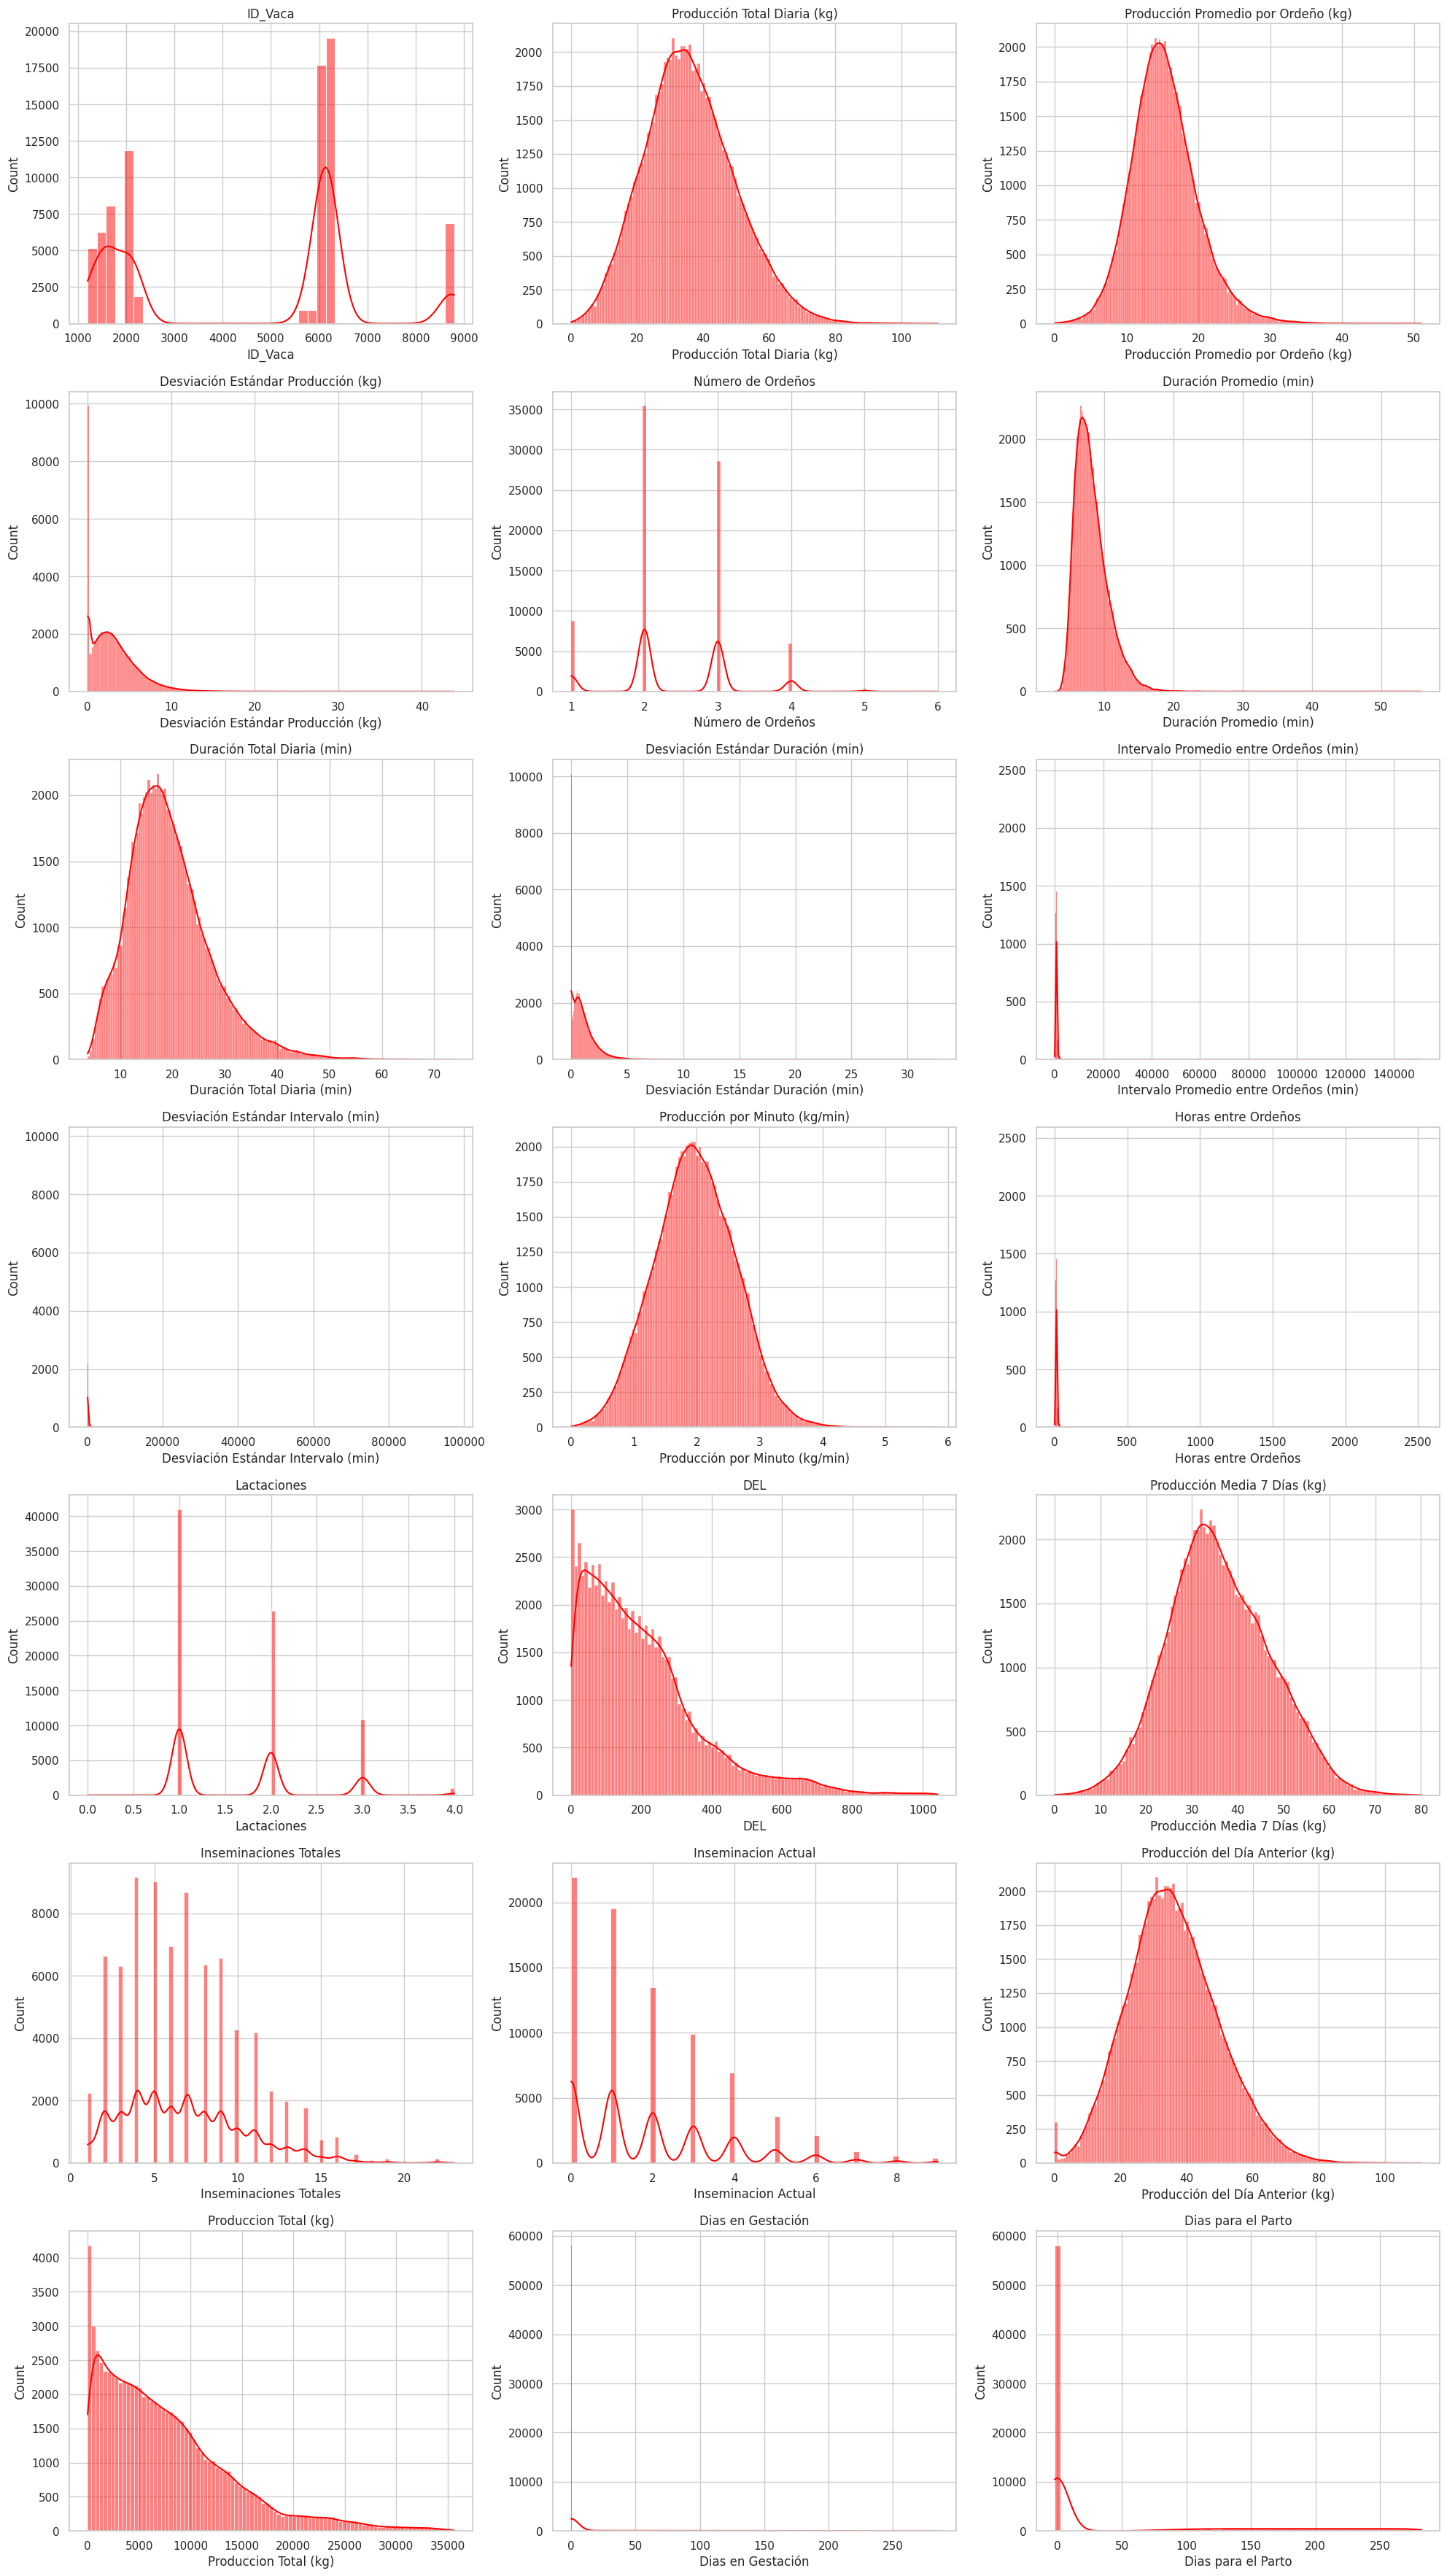

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = int(len(numeric_cols) / n_cols) + 1
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(col)
    plt.tight_layout()

plt.show()

### 1. Días en Ordeño (DEL)

 * Distribución con forma exponencial decreciente.
 * La mayoría de los valores se concentran entre 100 y 350 días.
 * Esto representa la duración típica de una lactación funcional.

> Interpretación:
> La curva es consistente con la fisiología de las vacas en ordeño. No se >observan valores anómalos.
---
### 2. Número de Lactaciones

 * Valores entre 0 y 4 lactancias.
 * Picos marcados en 1, 2 y 3 lactancias.

> Interpretación:
> El hato es relativamente joven; vacas con más de 4 lactancias son poco comunes >en sistemas intensivos.
---
### 3. Número de Inseminaciones Totales

 * Picos en 1, 2 y 3 servicios, lo cual es biológicamente ideal.
 * Algunos casos extremos ≥ 8 inseminaciones.

> Interpretación:
> La mayoría queda preñada rápidamente → buena fertilidad.
> Valores altos son outliers biológicos o posibles errores de captura.
---
### 4. Días en Gestación

   Distribución bimodal (dos picos):
 * Primer pico: 60–150 días → vacas recién preñadas.
 * Segundo pico: 200–260 días → vacas cercanas al parto.

> Interpretación:
> La bimodalidad es normal en ciclos reproductivos continuos.
---
### 5. Días para el Parto

   También presenta bimodalidad, en sentido opuesto:
 * Valores pequeños (0–100 días).
 * Valores altos (150–250 días).

> Interpretación:
> Confirma el patrón natural del ciclo de gestación.
---
### 6. Producción del Día Anterior (kg)

 * Distribución casi normal, con ligera asimetría.
 * Mayoría entre 25 y 45 kg/día.
 * < 15 kg: vacas recién paridas o secas.
 * 55 kg: vacas de alta producción o casos atípicos.

> Interpretación:
> Comportamiento típico de hatos de alta producción.
---
### 7. Producción Media 7 Días

 * Distribución similar a la producción del día anterior, pero más estable.
 * Reduce variabilidad diaria.

> Interpretación:
> Es una variable ideal para modelos predictivos, ya que suaviza fluctuaciones.
---
### 8. Producción Total en Lactación

 * Valores comunes entre 3000 y 12,000 kg.
 * 15,000 kg: lactaciones muy largas o registros potencialmente erróneos.

> Interpretación:
> Refleja consistencia entre duración de lactación y producción acumulada.

Realizamos la matriz de correlacion para poder identificar las variables numericas que mas inflenza tendran en nuestro modelo, lo bueno de ahora es que como ya filtramos los datos de las vacas que si nos serviran, podemos tomar mas enserio la correlacion que existe entre nuestras features y poder asi tomas desiciones

## Matriz de Correlación

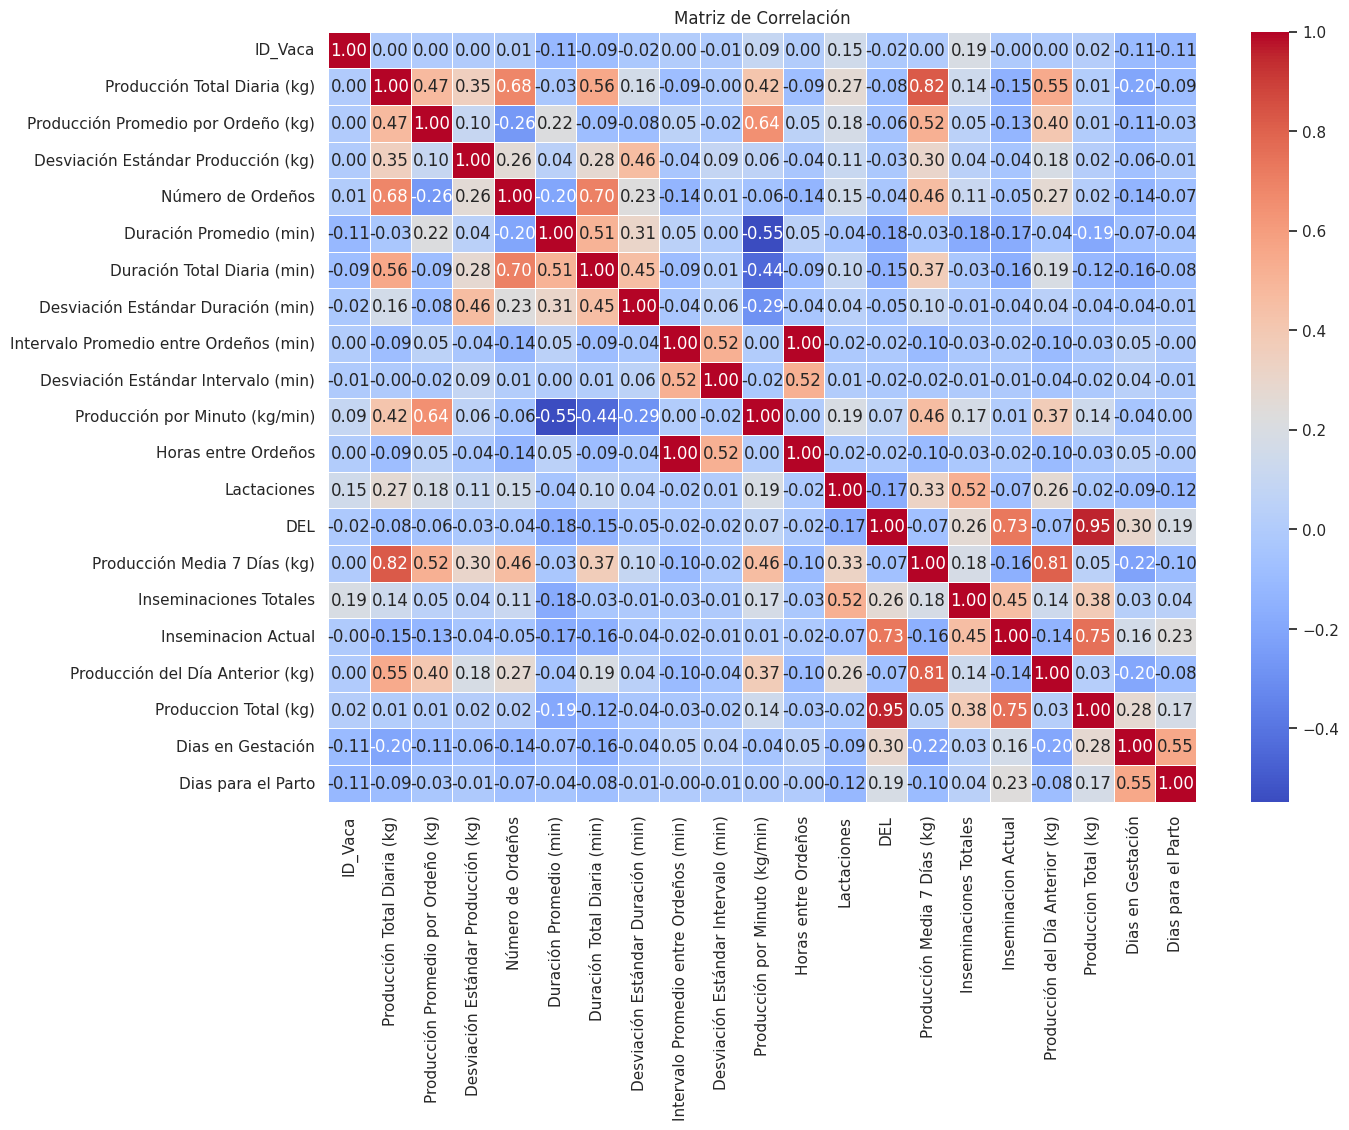

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
# sns.heatmap(corr, cmap="coolwarm", center=0)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

#### Producción Total Diaria (kg)
> Correlaciones moderadas-altas:
* Producción Promedio por Ordeño (≈ 0.65)
* Producción Media 7 Días (≈ 0.82)
* Producción del Día Anterior (≈ 0.55)
* Producción por Minuto (≈ 0.64)
* Número de Ordeños (≈ 0.70)

> Interpretación:
* Las variables de producción están fuertemente relacionadas entre sí.
* El número de ordeños y la producción por ordeño explican buena parte de la variabilidad.
* La producción de los últimos 7 días es un predictor fuerte de la producción diaria.
---

### 2. Correlación con la Producción Media 7 Días
> Correlaciones fuertes:
* Producción Total Diaria (≈ 0.82)
* Producción del Día Anterior (≈ 0.75)
* Producción Total en la Lactación (≈ 0.95)
* DEL (≈ 0.73)

> Interpretación:
* La media móvil de 7 días suaviza fluctuaciones y tiene comportamiento estable.
* Se relaciona fuertemente con variables acumuladas como Producción Total.
* A medida que aumentan los días en ordeño, aumenta la producción acumulada.
---

### 3. Producción Total en la Lactación
> Correlaciones fuertes:
* DEL (≈ 0.95)
* Producción Media 7 Días (≈ 0.95)

> Interpretación:
* La producción total depende principalmente de los días en ordeño.
* DEL es dominante y podría causar colinealidad si se incluye junto con producción total.
---

### 4. Relaciones reproductivas

### Días en Gestación vs Días para el Parto
> Correlación muy alta negativa (≈ -1.00)

Interpretación:
* Ambas variables son prácticamente inversas.
* No deben incluirse juntas en un modelo predictivo.

### Inseminación Actual vs Inseminaciones Totales
> Correlación alta (≈ 0.73)

Interpretación:
* A mayor número de servicios totales, mayor es el número de inseminación actual.
* Ambas variables miden prácticamente lo mismo y generan multicolinealidad.

---

### 5. Relación entre Ordeños y Tiempos
> Correlaciones relevantes:
* Número de Ordeños con Horas entre Ordeños (≈ -0.90)
* Número de Ordeños con Intervalo Promedio (≈ -0.90)

Interpretación:
* Cuando aumentan los ordeños, disminuyen los intervalos entre ordeños.
* Esta relación es mecánica y esperada.

---

### 6. Duración del Ordeño

> Correlación moderada:
* Duración Promedio con Duración Total Diaria (≈ 0.76)
* Duración Total Diaria con Producción Diaria (≈ 0.56)

Interpretación:
* Ordeños más largos suelen estar asociados a mayor producción.
* La duración promedio explica buena parte de la duración total.

---

### 7. Observaciones generales

> La matriz muestra grupos de variables altamente correlacionadas:
* Grupo de Producción: producción diaria, producción por ordeño, producción 7 días, producción total.
* Grupo de Reproducción: días para el parto, días en gestación, inseminaciones.
* Grupo de Ordeño: número de ordeños, tiempos e intervalos.

> Existen combinaciones que generan multicolinealidad:
* Días en Gestación vs Días para el Parto
* Producción Total vs DEL vs Producción Media 7 Días
* Inseminaciones Totales vs Inseminación Actual

> Estas variables deben manejarse con cuidado en modelos predictivos.


## Detección de Outliers

In [ ]:
def contar_outliers(df):
    outlier_counts = {}

    for col in df.select_dtypes(include=['float64','int64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr

        outliers = df[(df[col] < low) | (df[col] > high)]
        outlier_counts[col] = len(outliers)

    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outliers'])

outliers_df = contar_outliers(df_clean)
outliers_df

,Outliers
ID_Vaca,0
Producción Total Diaria (kg),634
Lactaciones,1062
DEL,3423
Producción Media 7 Días (kg),397
Inseminaciones Totales,741
Inseminacion Actual,908
Producción del Día Anterior (kg),630
Produccion Total (kg),2740
Dias en Gestación,17759


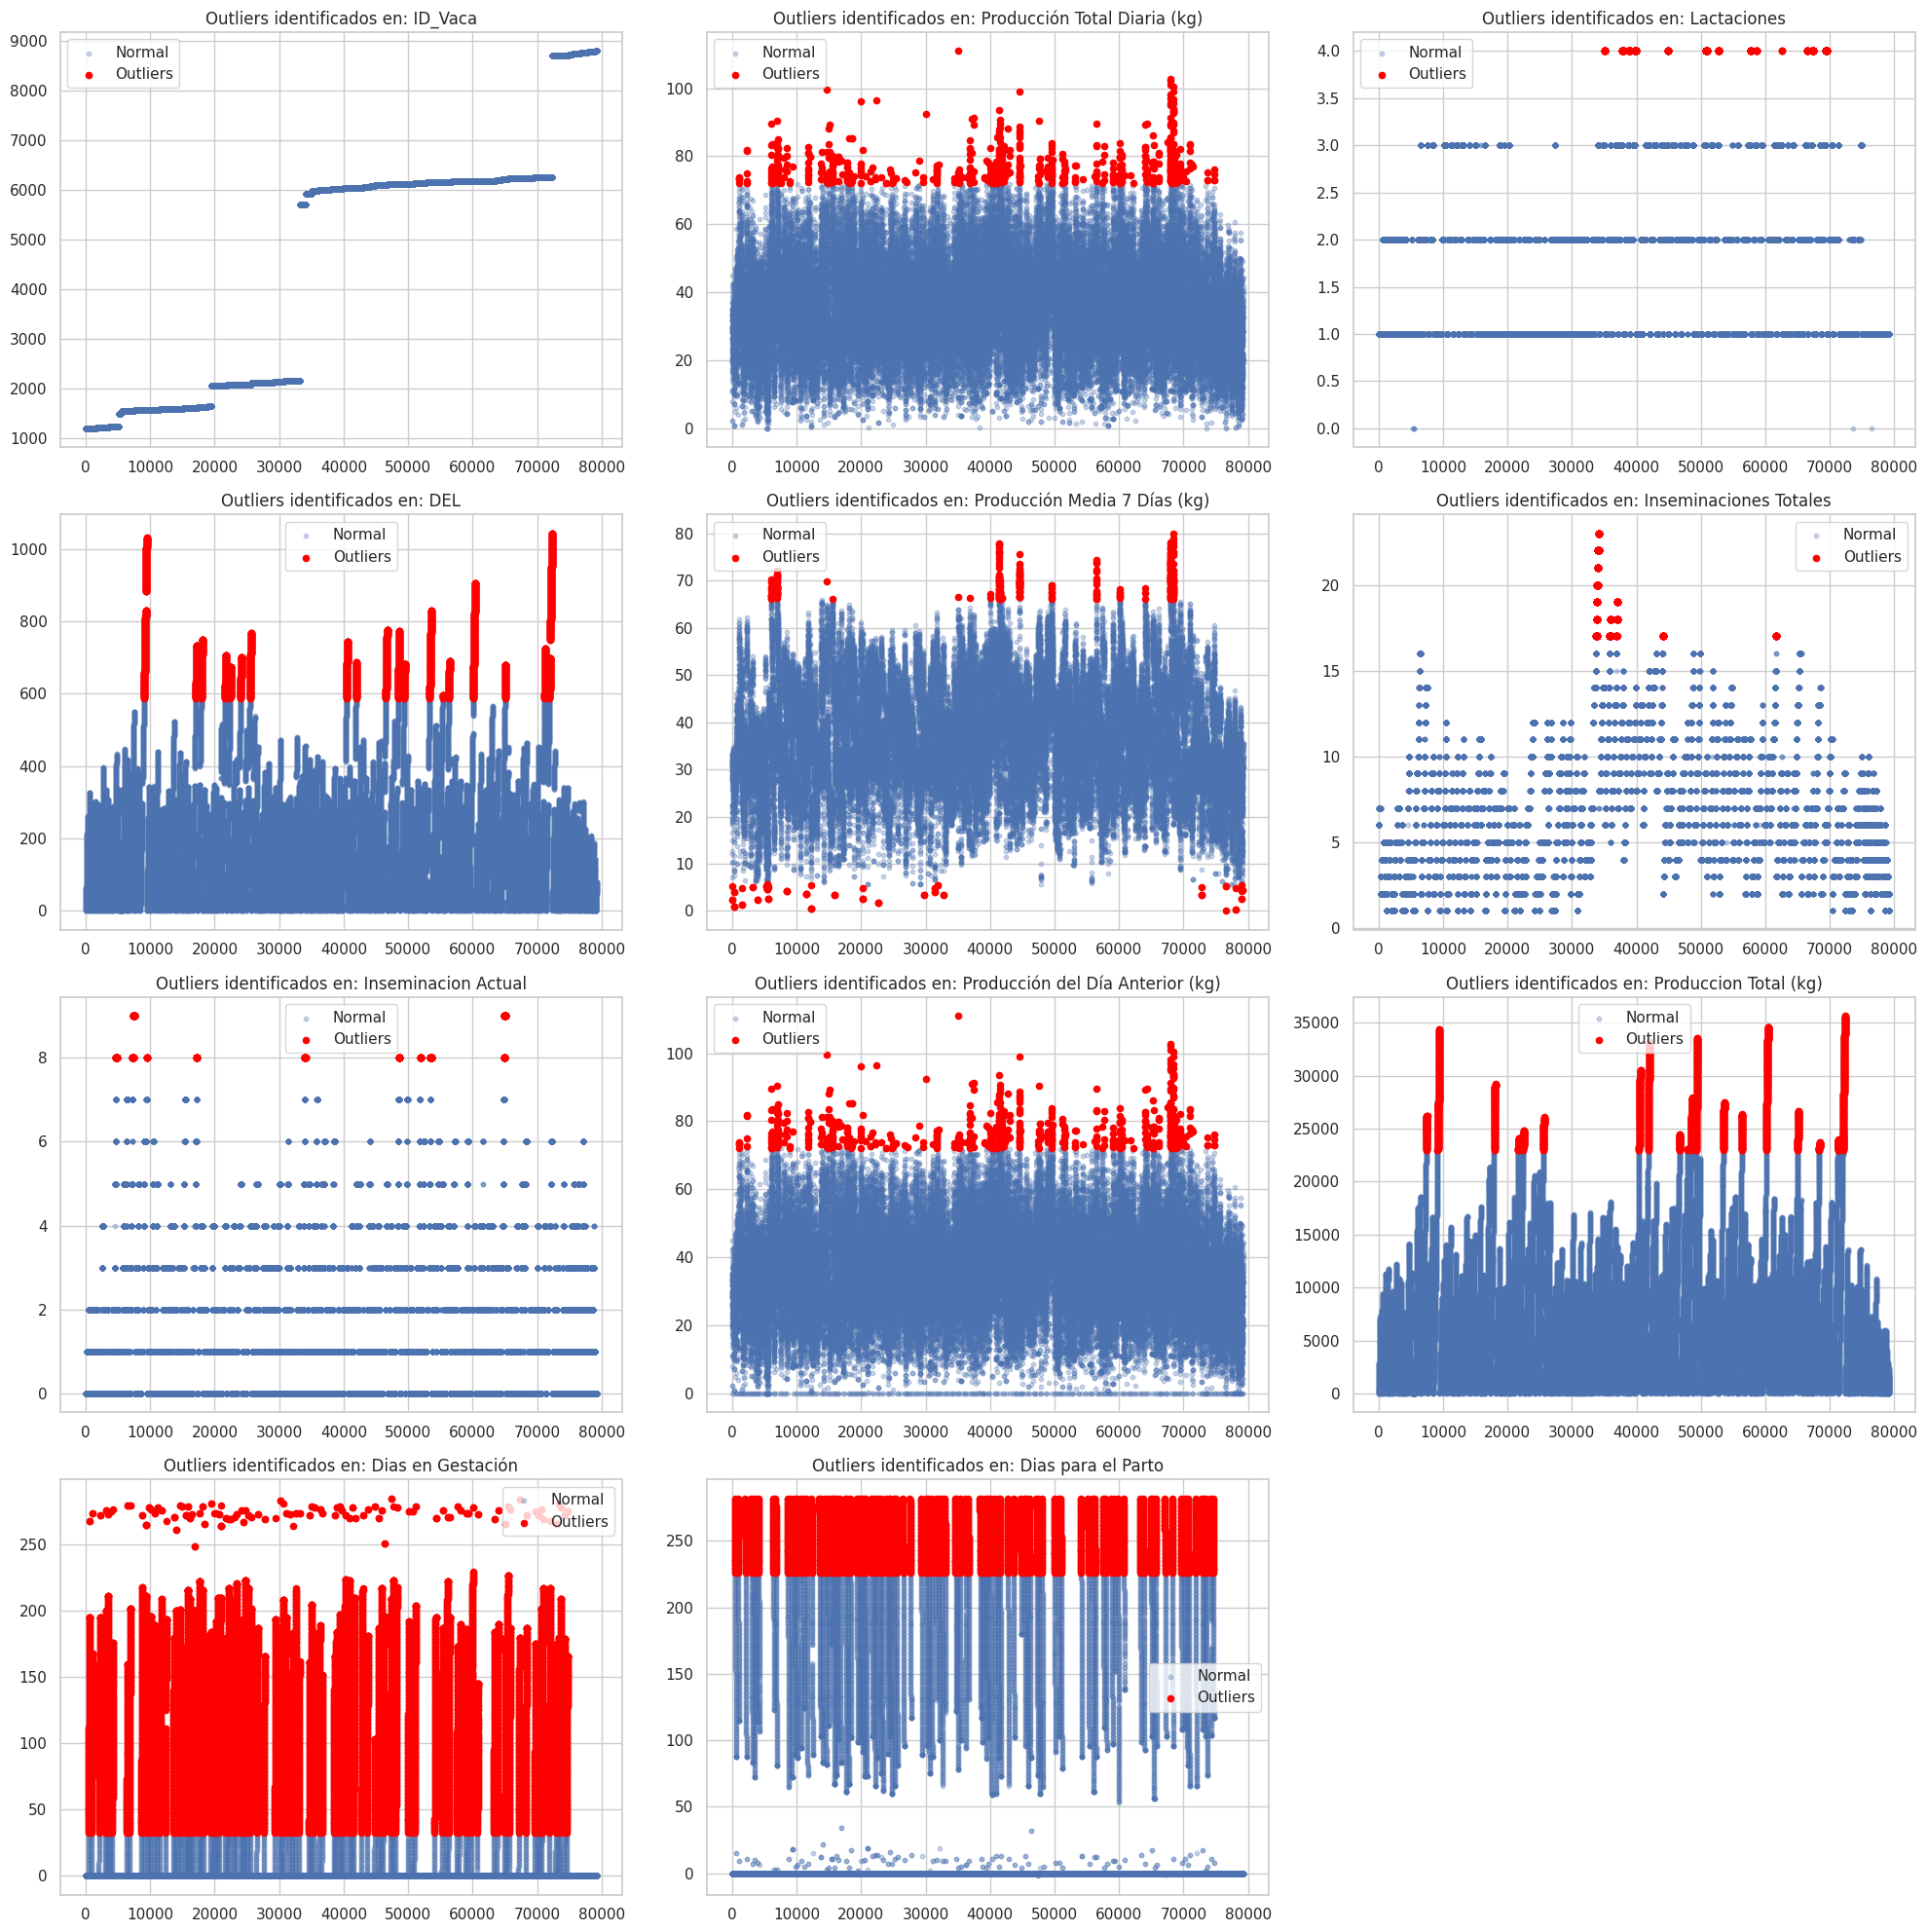

In [ ]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = int(len(numeric_cols) / n_cols) + 1 if len(numeric_cols) % n_cols != 0 else int(len(numeric_cols) / n_cols)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outliers = (df_clean[col] < low) | (df_clean[col] > high)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(df_clean.index, df_clean[col], alpha=0.3, label="Normal", s=10)
    plt.scatter(df_clean[outliers].index, df_clean[outliers][col], color="red", label="Outliers", s=20)
    plt.title(f"Outliers identificados en: {col}")
    plt.legend()
plt.tight_layout()
plt.show()

### 1. ID_Vaca
> Interpretación:
* No existen outliers reales.  
* Los valores rojos representan únicamente cambios bruscos en el rango de IDs debido a saltos en el sistema de identificación, no anomalías.
* Puede ignorarse para detección de outliers.

---

### 2. Producción Total Diaria (kg)
> Observaciones:
* Se identifican outliers en valores muy altos (> 55 kg).  
* También existen valores extremadamente bajos que pueden corresponder a vacas recién secas o recién paridas.

> Interpretación:
* Los outliers altos podrían ser errores de medición o registros atípicos.
* Los outliers bajos pueden ser biológicos y deben decidirse según contexto si se mantienen o no.

---

### 3. Lactaciones
> Observaciones:
* Se ven algunos valores rojos dispersos en lactancias mayores a 4.  

> Interpretación:
* Estos casos representan vacas atípicas con ciclos reproductivos más largos de lo usual.
* También podrían ser errores de captura, ya que la mayoría del hato está entre 1 y 3 lactancias.

---

### 4. DEL (Días en Ordeño)
> Observaciones:
* Hay una cantidad considerable de outliers en valores altos (vacas > 600 días en ordeño).

> Interpretación:
* Biológicamente, lactaciones tan largas son inusuales y pueden indicar:
  * errores de captura,
  * vacas con problemas reproductivos,
  * lactaciones extendidas por decisión de manejo.
* Requiere limpieza o revisión antes de modelar.

---

### 5. Producción Media 7 Días (kg)
> Observaciones:
* Existen outliers en valores muy altos y en valores extremadamente bajos.

> Interpretación:
* Los altos pueden ser registros incorrectos.
* Los bajos pueden asociarse a vacas en transición, secas o enfermas.
* Aun así, la mayoría sigue un patrón estable.

---

### 6. Inseminaciones Totales
> Observaciones:
* Los outliers se encuentran principalmente en valores elevados (8, 10, 12 servicios).

> Interpretación:
* Estos outliers representan vacas con problemas de fertilidad.
* No son errores; pueden ser outliers biológicos importantes.

---

### 7. Inseminación Actual
> Observaciones:
* Ocurre lo mismo: valores rojos se concentran en servicios altos.

> Interpretación:
* Nuevamente, indican problemas reproductivos reales.
* No deben eliminarse automáticamente.

---

### 8. Producción del Día Anterior (kg)
> Observaciones:
* Se ven outliers altos (> 55–60 kg) y bajos (< 10 kg).

> Interpretación:
* Muy similares a la producción total diaria.
* Los outliers altos pueden ser errores de sensor.
* Los bajos suelen ser biológicos (inicio o fin de lactación).

---

### 9. Producción Total (kg)
> Observaciones:
* Muchos outliers altos (producciones > 25,000–30,000 kg).

> Interpretación:
* Pueden representar:
  * lactaciones muy largas,
  * registros duplicados,
  * acumulaciones mal calculadas,
  * o errores de captura.
* Requiere revisión detallada antes de modelar.

---

### 10. Días en Gestación
> Observaciones:
* Se detectan outliers tanto en valores muy bajos como en valores cercanos al parto.
* Los valores rojos tienden a concentrarse en extremos.

> Interpretación:
* Son outliers biológicos naturales:
  * gestaciones muy tempranas,
  * gestaciones muy avanzadas.
* No deben eliminarse a menos que el modelo lo requiera.

---

### 11. Días para el Parto
> Observaciones:
* Los outliers se ven de manera inversa a Días en Gestación.
* Muchos puntos rojos en valores altos.

> Interpretación:
* La distribución invertida es normal (ambas variables son complementarias).
* Los outliers altos representan vacas recién preñadas.
* No son errores; forman parte del ciclo reproductivo.

## Valores Nulos

In [ ]:
df_clean.isnull().sum()

,0
ID_Vaca,0
Producción Total Diaria (kg),0
Lactaciones,0
DEL,0
Producción Media 7 Días (kg),0
Estado Reproductivo,500
Inseminaciones Totales,500
Inseminacion Actual,0
Producción del Día Anterior (kg),0
Produccion Total (kg),0


In [ ]:
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['ID_Vaca', 'Producción Total Diaria (kg)', 'Lactaciones', 'DEL',
        'Producción Media 7 Días (kg)', 'Inseminaciones Totales',
        'Inseminacion Actual', 'Producción del Día Anterior (kg)',
        'Produccion Total (kg)', 'Dias en Gestación', 'Dias para el Parto'],
       dtype='object'),
 Index(['Estado Reproductivo'], dtype='object'))

Inseminiaciones Totales al ser una variable numerica imputamos los valores con 0

In [ ]:
df_clean['Inseminaciones Totales'] = df_clean['Inseminaciones Totales'].fillna(0)

Estado Reproductivo al ser una variables categoricas imputamos con "desconocido"

In [ ]:
df_clean['Estado Reproductivo'] = df_clean['Estado Reproductivo'].fillna("Desconocido")

Confirmemos que ya no haya nulos

In [ ]:
df_clean.isnull().sum()

,0
ID_Vaca,0
Producción Total Diaria (kg),0
Lactaciones,0
DEL,0
Producción Media 7 Días (kg),0
Estado Reproductivo,0
Inseminaciones Totales,0
Inseminacion Actual,0
Producción del Día Anterior (kg),0
Produccion Total (kg),0


## Analisis Bivariante

Producción vs Días en Ordeño

<Axes: xlabel='DEL', ylabel='Producción Total Diaria (kg)'>

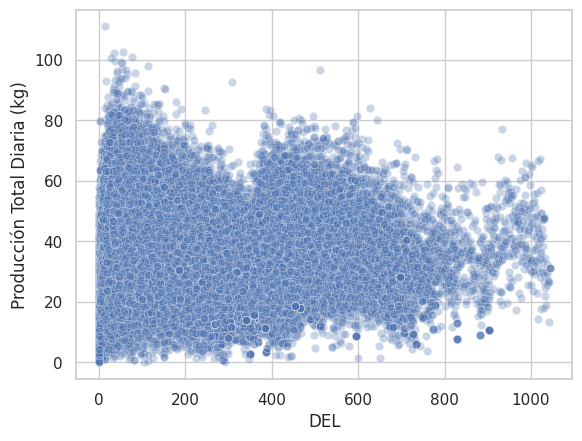

In [ ]:
sns.scatterplot(data=df_clean, x="DEL", y="Producción Total Diaria (kg)",
                alpha=0.3)

Podemos notar que al inicio de los Dias en Leche, las vacas tienen una produccion muy alta, y conforme van avanzado hasta los 200 dias es cuando vemos una disminucion significativa, si en embargo en el dia 400, podemos ver un repunte que se mantiene hasta el dia 600, esto nos indica que la mayoria de las vacas encuentran su perido mas estable entre los (400 a 600 dias), pasando los 700 diasvemos una disminicion en la cantidad de vacas y en su misma produccion, vacas que duran 1000 dias en leche tienden a producir maximo (50 a 60 kg) diarios

Producción vs Producción Media 7 días

<Axes: xlabel='Producción Media 7 Días (kg)', ylabel='Producción Total Diaria (kg)'>

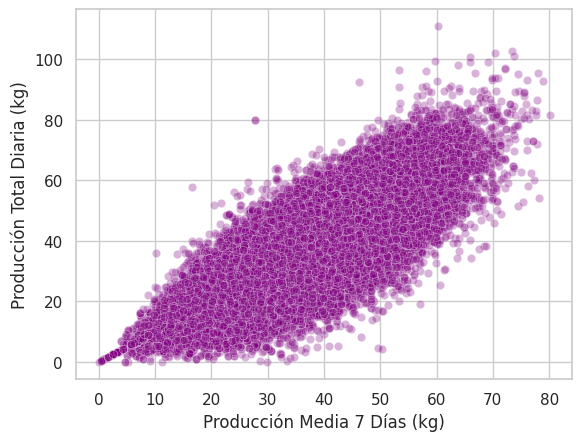

In [ ]:
sns.scatterplot(data=df_clean, x="Producción Media 7 Días (kg)", y="Producción Total Diaria (kg)",
                alpha=0.3,
                color='purple')

Producción vs Producción del Día Anterior

<Axes: xlabel='Producción del Día Anterior (kg)', ylabel='Producción Total Diaria (kg)'>

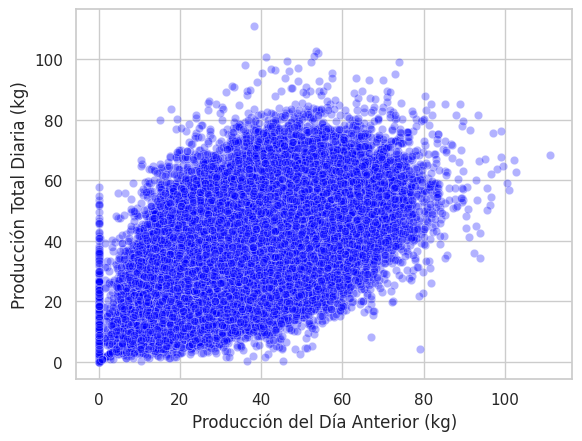

In [ ]:
sns.scatterplot(x="Producción del Día Anterior (kg)", y="Producción Total Diaria (kg)",
                alpha=0.3,
                data=df_clean,
                color='blue')


Inseminaciones Totales vs DEL

<Axes: xlabel='DEL', ylabel='Inseminaciones Totales'>

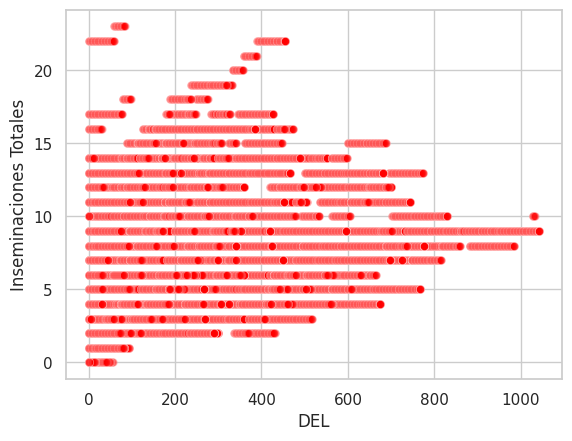

In [ ]:
sns.scatterplot(x="DEL", y="Inseminaciones Totales",
                data=df_clean,
                alpha=0.3,
                color='red')

Días para el Parto vs Producción

<Axes: xlabel='Dias para el Parto', ylabel='Producción Total Diaria (kg)'>

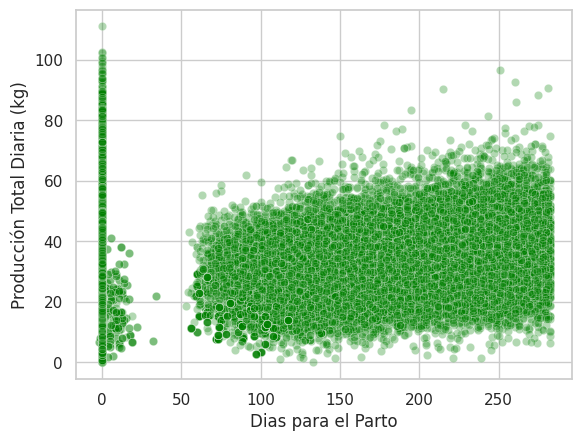

In [ ]:
sns.scatterplot(x="Dias para el Parto", y="Producción Total Diaria (kg)",
                alpha=0.3,
                data=df_clean,
                color = 'green')